In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

In [6]:
cols = ["arch", "activation", "attack", "iterations", "eps 2", "eps 4", "eps 6", "eps 8", "eps 10", "SROCC"]
data = pd.read_csv("rs/results.csv", header=0, usecols=cols)

In [7]:
data.sample(5, random_state=0)

,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
49,vonenet50-Linearity,relu,IFGSM,5,0.827613,1.204486,1.295609,1.254712,1.188955,0.858145
27,resnet50-Linearity,elu,IFGSM,3,0.554497,0.590070,0.558246,0.490785,0.425932,0.908697
30,resnet18-Linearity,relu,IFGSM,3,0.917008,1.026367,0.982350,0.851601,0.737798,0.895401
63,textureresnet50-Linearity,relu,IFGSM,5,1.634478,1.750998,1.596155,1.370919,1.177739,0.904118
45,resnet50-Linearity,Felu,IFGSM,5,0.213586,0.216705,0.203963,0.196842,0.199499,0.836820


In [8]:
fsilu_data = data[(data["arch"]=="resnet50-Linearity")&(data["activation"]=="Fsilu")].loc[:,"eps 2": "eps 10"].values
print(fsilu_data[0][0],fsilu_data[-1])

0.163610402542497 [0.97357313 1.26601247 1.30603955 1.22152177 1.11837141]


In [9]:
group1 = [("resnet18-Linearity", "relu"), ("resnet34-Linearity", "relu"), ("resnet50-Linearity", "relu"), ("wideresnet50-Linearity", "relu")]
group2 = [("resnet50-Linearity", "relu"), ("resnet50-Linearity", "silu"), ("resnet50-Linearity", "relu_silu"),("resnet50-Linearity", "Frelu_silu"),("resnet50-Linearity", "relu_elu"),("resnet50-Linearity", "Frelu_elu"),("resnet50-Linearity", "relu_gelu"),("resnet50-Linearity", "Fsilu"),("resnet50-Linearity", "elu"),("resnet50-Linearity", "gelu"),("resnet50-Linearity", "Fgelu"),("resnet50-Linearity", "Felu") ]
group3 = [("resnet50-Linearity", "relu"),("advresnet50-Linearity","relu"),("wideresnet50-Linearity", "relu"),("vonenet50-Linearity", "relu"),("resnet50-Linearity+prune=0.1pls", "relu"),("resnet50-Linearity+prune=0.1l1", "relu"),("resnet50-Linearity+prune=0.1l2", "relu"), ("resnet50-Linearity+prune=0.1pls", "Felu")]
group4 = [("textureresnet50-Linearity","relu"), ("shaperesnet50-Linearity","relu"), ("debiasedresnet50-Linearity","relu")]

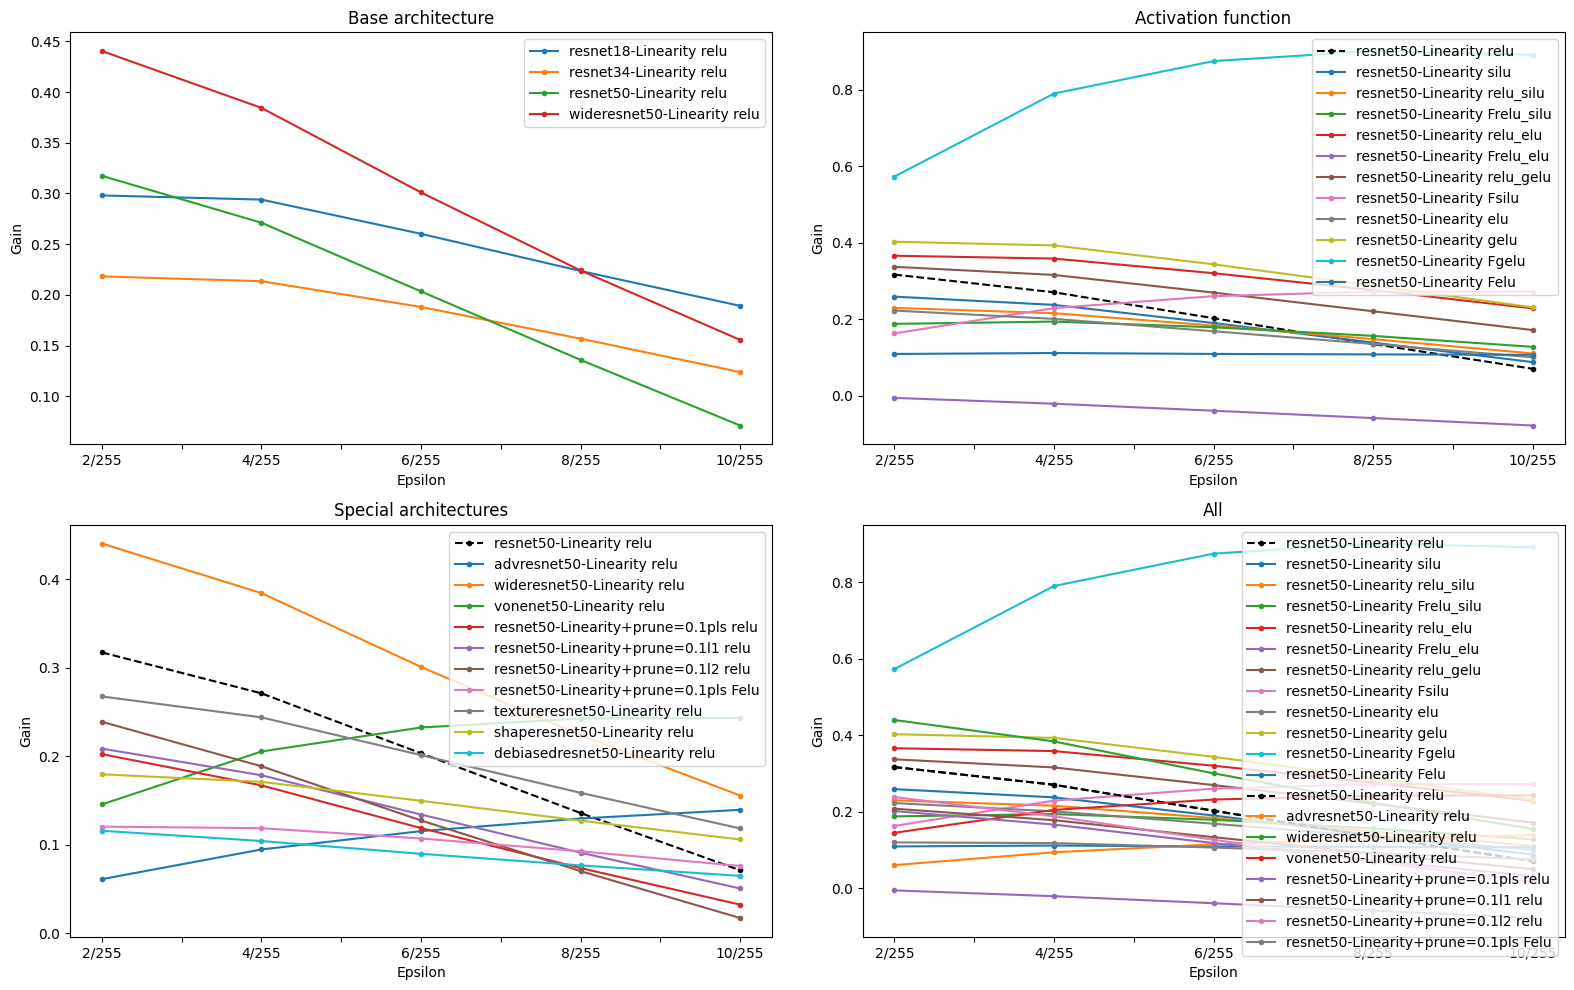

In [10]:
group = group2 + group3
groups = [group1, group2, group3+group4, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']

fig, axs = plt.subplots(2,2, figsize=(16,10), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
baseline = [('resnet18-Lineatiyt','relu'),('resnet50-Linearity','relu')]
axs[0,0].set_title("Base architecture")
axs[0,1].set_title("Activation function")
axs[1,0].set_title("Special architectures")
axs[1,1].set_title("All")
fig.tight_layout()

# axs[0,1].set_ylim(fsilu_data[0][1], fsilu_data[0][-1])

for i in range(4):
    axis = axs[i//2, i%2]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if (i==0 and (arch, activ) == baseline[0])or(i>0 and (arch, activ) == baseline[1]):
            axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        else:
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    axis.legend(loc="upper right")

plt.show()
fig.savefig('graph4.png')


In [12]:
x = [2, 4, 6, 8, 10]
grp = set(group1+group2+group3+group4)
df_ifgsm1_all_eps = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df_ifgsm1_all_eps.loc[len(df_ifgsm1_all_eps)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': float(srocc),
                       'result': float(abs(np.trapezoid(y_axis, x)))}
df_ifgsm1_all_eps.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Frelu_elu,0.852854,0.314930
debiasedresnet50-Linearity,relu,0.900750,0.721931
resnet50-Linearity+prune=0.1pls,Felu,0.842097,0.833254
resnet50-Linearity,Felu,0.836820,0.879594
advresnet50-Linearity,relu,0.854453,0.879987
resnet50-Linearity+prune=0.1pls,relu,0.905343,0.953854
resnet50-Linearity+prune=0.1l2,relu,0.907126,1.028814
resnet50-Linearity+prune=0.1l1,relu,0.906935,1.066691
shaperesnet50-Linearity,relu,0.900756,1.181597
resnet50-Linearity,elu,0.908697,1.338083


In [4]:
group = group2 + group3
groups = [group1, group2, group3+group4, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']

fig, axs = plt.subplots(2,2, figsize=(16,10), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
baseline = [('resnet18-Lineatiyt','relu'),('resnet50-Linearity','relu')]
axs[0,0].set_title("Base architecture")
axs[0,1].set_title("Activation function")
axs[1,0].set_title("Special architectures")
axs[1,1].set_title("All")
fig.tight_layout()

# axs[0,1].set_ylim(fsilu_data[0][1], fsilu_data[0][-1])

for i in range(4):
    axis = axs[i//2, i%2]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if (i==0 and (arch, activ) == baseline[0])or(i>0 and (arch, activ) == baseline[1]):
            axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        else:
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    axis.legend(loc="upper right")

plt.show()
fig.savefig('graph4.png')


NameError: name 'plt' is not defined

In [33]:
x = [2, 4, 6, 8, 10]
grp = set(group1+group2+group3+group4)
df2 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df2.loc[len(df2)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': float(format(np.trapezoid(y_axis, x), '.2f'))}
df2.sort_values(('result'))

,architecture,activation,SROCC,result
10,resnet50-Linearity,Felu,0.84,1.49
13,advresnet50-Linearity,relu,0.85,2.90
9,debiasedresnet50-Linearity,relu,0.90,3.48
17,resnet34-Linearity,relu,0.90,3.95
1,resnet50-Linearity,elu,0.91,4.26
5,resnet50-Linearity+prune=0.1pls,relu,0.91,4.37
14,resnet50-Linearity+prune=0.1l1,relu,0.91,4.57
8,resnet50-Linearity,relu,0.91,4.77
3,resnet50-Linearity+prune=0.1l2,relu,0.91,4.83
6,resnet50-Linearity,relu_silu,0.91,5.90


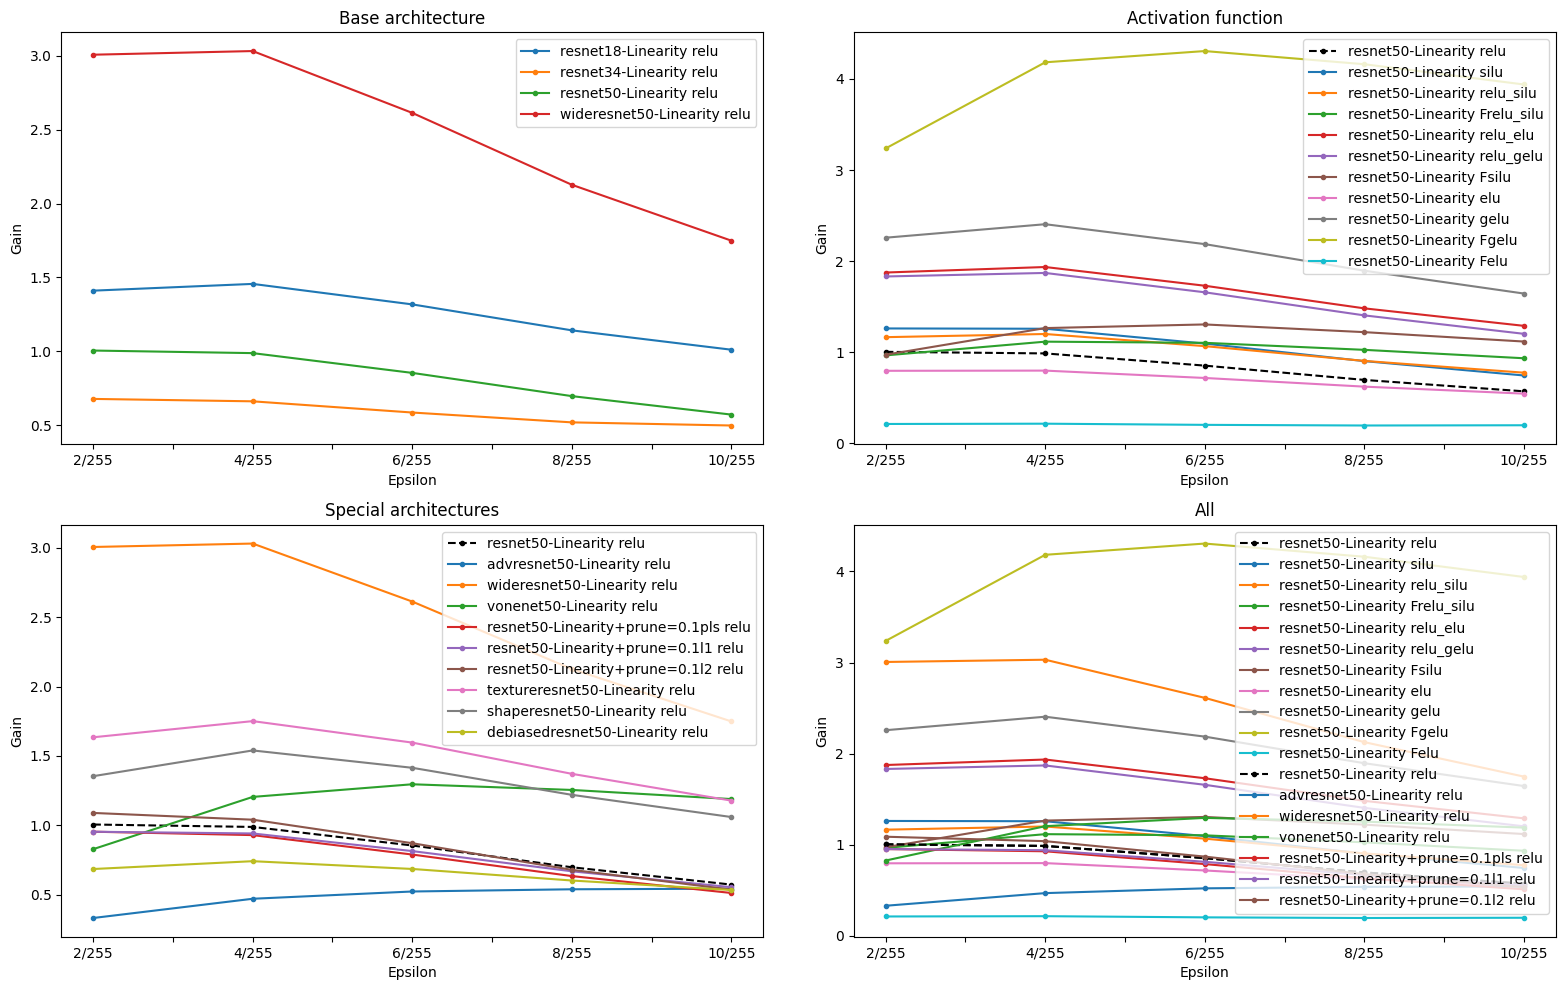

In [22]:
group = group2 + group3
groups = [group1, group2, group3+group4, group]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']

fig, axs = plt.subplots(2,2, figsize=(16,10), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})
baseline = [('resnet18-Lineatiyt','relu'),('resnet50-Linearity','relu')]
axs[0,0].set_title("Base architecture")
axs[0,1].set_title("Activation function")
axs[1,0].set_title("Special architectures")
axs[1,1].set_title("All")
fig.tight_layout()

# axs[0,1].set_ylim(fsilu_data[0][1], fsilu_data[0][-1])

for i in range(4):
    axis = axs[i//2, i%2]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if (i==0 and (arch, activ) == baseline[0])or(i>0 and (arch, activ) == baseline[1]):
            axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{arch} {activ}")
        else:
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    axis.legend(loc="upper right")

plt.show()
fig.savefig('graph4.png')


In [34]:
x = [2, 4, 6, 8, 10]
grp = set(group1+group2+group3+group4)
df3 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df3.loc[len(df3)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': float(format(np.trapezoid(y_axis, x), '.2f'))}
df3.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Felu,0.84,1.650000
advresnet50-Linearity,relu,0.85,3.940000
resnet34-Linearity,relu,0.90,4.710000
debiasedresnet50-Linearity,relu,0.90,5.270000
resnet50-Linearity,elu,0.91,5.630000
resnet50-Linearity+prune=0.1pls,relu,0.91,6.170000
resnet50-Linearity+prune=0.1l1,relu,0.91,6.350000
resnet50-Linearity,relu,0.91,6.660000
resnet50-Linearity+prune=0.1l2,relu,0.91,6.800000
resnet50-Linearity,relu_silu,0.91,8.290000


In [35]:
x = [2, 4, 6]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[2]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': format(np.trapezoid(y_axis, x), '.2f')}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
advresnet50-Linearity,relu,0.85,0.37
debiasedresnet50-Linearity,relu,0.90,0.41
resnet50-Linearity,Felu,0.84,0.44
resnet50-Linearity+prune=0.1pls,relu,0.91,0.66
shaperesnet50-Linearity,relu,0.90,0.67
resnet50-Linearity+prune=0.1l1,relu,0.91,0.70
resnet50-Linearity+prune=0.1l2,relu,0.91,0.74
resnet50-Linearity,Frelu_silu,0.88,0.76
vonenet50-Linearity,relu,0.86,0.79
resnet50-Linearity,elu,0.91,0.80


In [36]:
x = [6, 8, 10]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[2]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==1.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': format(np.trapezoid(y_axis, x), '.2f')}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity+prune=0.1l2,relu,0.91,0.28
resnet50-Linearity+prune=0.1pls,relu,0.91,0.30
debiasedresnet50-Linearity,relu,0.90,0.31
resnet50-Linearity+prune=0.1l1,relu,0.91,0.37
resnet50-Linearity,Felu,0.84,0.44
shaperesnet50-Linearity,relu,0.90,0.51
advresnet50-Linearity,relu,0.85,0.51
resnet50-Linearity,elu,0.91,0.54
resnet50-Linearity,relu,0.91,0.55
resnet50-Linearity,silu,0.90,0.56


In [37]:
x = [2, 4, 6]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[2]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': float(format(np.trapezoid(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Felu,0.84,0.760000
advresnet50-Linearity,relu,0.85,1.250000
debiasedresnet50-Linearity,relu,0.90,1.810000
resnet34-Linearity,relu,0.90,2.160000
resnet50-Linearity,elu,0.91,2.290000
resnet50-Linearity+prune=0.1pls,relu,0.91,2.490000
resnet50-Linearity+prune=0.1l1,relu,0.91,2.570000
resnet50-Linearity,relu,0.91,2.690000
resnet50-Linearity+prune=0.1l2,relu,0.91,2.820000
vonenet50-Linearity,relu,0.86,2.890000


In [38]:
x = [6, 8, 10]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[2]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==3.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': float(format(np.trapezoid(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Felu,0.84,0.730000
advresnet50-Linearity,relu,0.85,1.650000
debiasedresnet50-Linearity,relu,0.90,1.670000
resnet34-Linearity,relu,0.90,1.790000
resnet50-Linearity+prune=0.1pls,relu,0.91,1.880000
resnet50-Linearity,elu,0.91,1.970000
resnet50-Linearity+prune=0.1l1,relu,0.91,2.000000
resnet50-Linearity+prune=0.1l2,relu,0.91,2.010000
resnet50-Linearity,relu,0.91,2.070000
resnet50-Linearity,relu_silu,0.91,2.690000


In [39]:
x = [2, 4, 6]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[2]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': float(format(np.trapezoid(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Felu,0.84,0.850000
advresnet50-Linearity,relu,0.85,1.790000
resnet34-Linearity,relu,0.90,2.590000
debiasedresnet50-Linearity,relu,0.90,2.850000
resnet50-Linearity,elu,0.91,3.110000
resnet50-Linearity+prune=0.1pls,relu,0.91,3.600000
resnet50-Linearity+prune=0.1l1,relu,0.91,3.650000
resnet50-Linearity,relu,0.91,3.840000
resnet50-Linearity+prune=0.1l2,relu,0.91,4.040000
resnet50-Linearity,Frelu_silu,0.88,4.300000


In [40]:
x = [6, 8, 10]
grp = set(group1+group2+group3+group4)
df1 = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result'])
for arch, activ in grp:
    y_axis = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,f"eps {epsilons[2]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    srocc = data[(data["arch"]==arch)&(data["iterations"]==5.0)&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df1.loc[len(df1)] = {'architecture': arch, 
                       'activation': activ,
                       'SROCC': format(srocc,'.2f'),
                       'result': float(format(np.trapezoid(y_axis, x), '.2f'))}
df1.sort_values('result').style.hide()

architecture,activation,SROCC,result
resnet50-Linearity,Felu,0.84,0.800000
resnet34-Linearity,relu,0.90,2.120000
advresnet50-Linearity,relu,0.85,2.140000
debiasedresnet50-Linearity,relu,0.90,2.420000
resnet50-Linearity,elu,0.91,2.510000
resnet50-Linearity+prune=0.1pls,relu,0.91,2.570000
resnet50-Linearity+prune=0.1l1,relu,0.91,2.700000
resnet50-Linearity+prune=0.1l2,relu,0.91,2.760000
resnet50-Linearity,relu,0.91,2.820000
resnet50-Linearity,silu,0.90,3.650000


In [106]:
baseline = ('resnet50', 'relu')
type1 = {
    'architecture': ['resnet50'], 
    'activation':[
    'silu', 'relu_silu', 'Frelu_silu',
    'elu', 'gelu',
    'Fsilu', 'Fgelu',
    'Felu',
]}
type2 = {'architecture': ['resnet18', 'resnet34', 'wideresnet50'],
        'activation':['relu']}
type3 = {'architecture': ['vonenet50', 'shaperesnet50', 'textureresnet50', 'debiasedresnet50', 'advresnet50'],
         'activation': ['relu']}
type4 = { 'architecture': ['resnet50+prune=0.1pls', 'resnet50+prune=0.1l1', 'resnet50+prune=0.1l2'],
         'activation': ['relu']}

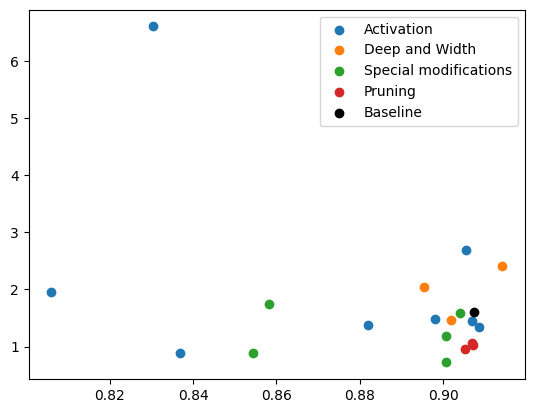

In [107]:

types = [type1, type2, type3, type4]
color = ['red', 'blue', 'purple', 'green']
df_ifgsm1_all_eps['architecture'] = df_ifgsm1_all_eps['architecture'].apply(lambda x: x.replace('-Linearity',''))

# plt.scatter(df_ifgsm1_all_eps['SROCC'], df_ifgsm1_all_eps['result'])
fig, ax = plt.subplots(4,4)
type1_df = df_ifgsm1_all_eps[(df_ifgsm1_all_eps['architecture'].isin(type1['architecture']))&(df_ifgsm1_all_eps['activation'].isin(type1['activation']))]
ax.scatter(type1_df['SROCC'], type1_df['result'], label="Activation")
type2_df = df_ifgsm1_all_eps[(df_ifgsm1_all_eps['architecture'].isin(type2['architecture']))&(df_ifgsm1_all_eps['activation'].isin(type2['activation']))]
ax.scatter(type2_df['SROCC'], type2_df['result'], label="Deep and Width")
type3_df = df_ifgsm1_all_eps[(df_ifgsm1_all_eps['architecture'].isin(type3['architecture']))&(df_ifgsm1_all_eps['activation'].isin(type3['activation']))]
ax.scatter(type3_df['SROCC'], type3_df['result'], label="Special modifications")
type4_df = df_ifgsm1_all_eps[(df_ifgsm1_all_eps['architecture'].isin(type4['architecture']))&(df_ifgsm1_all_eps['activation'].isin(type4['activation']))]
ax.scatter(type4_df['SROCC'], type4_df['result'], label="Pruning")

df_baseline = df_ifgsm1_all_eps[(df_ifgsm1_all_eps['architecture']=='resnet50')&(df_ifgsm1_all_eps['activation']=='relu')]
ax.scatter(df_baseline['SROCC'], df_baseline['result'], color='black', label="Baseline")

ax.legend()
plt.show()